<a href="https://colab.research.google.com/github/VitorSRamos/CNN-MorfGal/blob/main/exemplos%20de%20treinamento/CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação

## Módulos

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tqdm.keras import TqdmCallback
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.callbacks import ModelCheckpoint

In [ ]:
os.environ['PYTHONHASHSEED'] = '12'
np.random.seed(123)
random.seed(1234)
tf.random.set_seed(12345)

## Dados

In [ ]:
folder_path = '/content/drive/MyDrive/.../png_data/'

filenames = os.listdir(folder_path) # Crio lista com nomes de arquivos na pasta de imagens

# Carregando as imagens para uma lista de tensores. É possível normalizar os tensores usando "Rescaled_image = np.array(Resized_image)/255" dentro do loop
Input_images = []
for image in filenames:
  # carregando imagens na resolução desejada 
  Resized_image  = tf.keras.preprocessing.image.load_img(folder_path+image, target_size=(128,128))
  # Transformando em array do numpy e normalizando
  array_image = np.array(Resized_image)/255
  # Guardando a imagem na lista
  Input_images.append(array_image)

In [ ]:
# Nova lista retirando o '.png' do final dos nomes dos arquivos
labels = [filename[:-4] for filename in filenames]
print(labels[0])
len(labels)

# Pegando itens que dão erro (rótulo duplo)
error_idx = []
counter = 0
for item in labels:
    if item[-1] == item[-3]:
        error_idx.append(counter)
    counter += 1
print('Houveram {} erros'.format(len(error_idx)))

# Corrigindo erros:
error_idx.sort(reverse=True) # fazendo do maior índice pro menor para evitar mudanças de índice
for item in error_idx:
    labels.pop(item)
    filenames.pop(item)
    Input_images.pop(item)

# Checando a existencia de erros após correção
new_error_idx = []
new_counter = 0
for item in labels:
    if item[-1] == item[-3]:
        new_error_idx.append(new_counter)
    new_counter += 1
print('Houveram {} erros'.format(len(new_error_idx)))                                                   

SPLUS.STRIPE82-0126.18742.grizE0S1
Houveram 103 erros
Houveram 0 erros


In [ ]:
def get_label_list(file_list):
    label_list = []
    for item in file_list:
        if item[-1] == item[-3]:
            print('Erro')
            break
        elif item[-1] == '1': # Spiral

            label_list.append(0)
        elif item[-3] == '1': # Elliptical
            label_list.append(1)
        return label_list

In [ ]:
num_labels = [] # Spiral 0, Elliptical 1

for item in labels:
    if item[-1] == '1':
        num_labels.append(0)
    else:
        num_labels.append(1)
        
print(num_labels)
print(len(num_labels))
print(num_labels.count(1))
print(num_labels.count(0))

[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 

# Verificações e limpeza

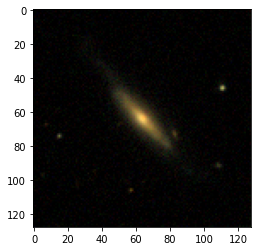

In [ ]:
plt.imshow(Input_images[2000])

In [ ]:
print('A lista de imagens tem {} imagens'.format(len(Input_images)))

print('A lista de labels tem {} labels,'.format(len(num_labels)))

print('dos quais {} são espirais, {} elípticos e {} incertos'.format(num_labels.count(0), num_labels.count(1), num_labels.count(2)))

A lista de imagens tem 4129 imagens
A lista de labels tem 4129 labels,
dos quais 2906 são espirais, 1223 elípticos e 0 incertos


É necessário limpar os valores incertos para fazer uma classificação binária. Além disso, para manetar a simplicidade, a classificação simples, o conjunto de imagens será balanceado. Primeiro excluindo os incertos:

In [ ]:
unc_idx = [] # Crio uma lista com índices de incertos

idx=0
for label in num_labels: # Loop para procurar índices 2 (incertos) na lista num_labels
    if label == 2:
        unc_idx.append(idx)
    idx += 1

print(len(unc_idx))

unc_idx.sort(reverse=True) # reverto a ordem da lista para evitar problemas com mudanças de índice após pop

for index in unc_idx: # Loop que retira os objetos incertos da lista
    num_labels.pop(index)
    Input_images.pop(index)

0


Agora balanceando o conjunto de dados:

In [ ]:
while num_labels.count(0) != num_labels.count(1): 
    
    pop_idx = random.randint(0, len(num_labels)-1) # Gero índice aleatório de num_labels e caso seja 0 (espiral), removo das duas listas
    
    if num_labels[pop_idx] == 0:
        Input_images.pop(pop_idx)
        num_labels.pop(pop_idx)

In [ ]:
print('A lista de imagens tem {} imagens'.format(len(Input_images)))

print('A lista de labels tem {} labels,'.format(len(num_labels)))

print('dos quais {} são espirais, {} elípticos e {} incertos'.format(num_labels.count(0), num_labels.count(1), num_labels.count(2)))

A lista de imagens tem 2446 imagens
A lista de labels tem 2446 labels,
dos quais 1223 são espirais, 1223 elípticos e 0 incertos


# Pré-processamento

In [ ]:
# transformando listas em arrays e verificando shapes
X = np.array(Input_images)
Y = np.array(num_labels)

# Separando em treinamento, validação e teste
x_train, x_val , y_train, y_val = train_test_split(X, Y, test_size=.3, stratify = Y) # 70% treinamento, 30% validação, que ainda será dividida para teste
x_val, x_test , y_val, y_test = train_test_split(x_val, y_val, test_size=1/3, stratify = y_val) # 2/3 (20% do total) para validação, 1/3 (10% do total) para teste

# Aplicando One Hot Encoding aos labels
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

# Criando Gerador de Augmentation
train_generator = ImageDataGenerator(rotation_range = 180, horizontal_flip = True, vertical_flip = True )
train_generator.fit(x_train)

In [ ]:
# verificando dimensões
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)


((1712, 128, 128, 3), (1712, 2))
((489, 128, 128, 3), (489, 2))
((245, 128, 128, 3), (245, 2))


# Definição da Arquitetura

In [ ]:
Input   = tf.keras.layers.Input

Conv2D  = tf.keras.layers.Conv2D
MaxPool = tf.keras.layers.MaxPooling2D
Flatten = tf.keras.layers.Flatten
Dropout = tf.keras.layers.Dropout
Dense   = tf.keras.layers.Dense

def Convolutional_Model():
    Input_Layer = Input(shape=x_train[0].shape)

    l = Conv2D(filters=16, kernel_size=3, activation='relu')(Input_Layer)
    l = MaxPool(2)(l)

    l = Conv2D(filters=32, kernel_size=3, activation='relu')(l)
    l = MaxPool(2)(l)

    l = Conv2D(filters=64, kernel_size=3, activation='relu')(l)
    l = MaxPool(2)(l)
    
    l = Conv2D(filters=128, kernel_size=3, activation='relu')(l)
    l = MaxPool(2)(l)
    
    l = Flatten()(l)
    
    l = Dropout(0.5)(l)
    l = Dense(256, activation='relu')(l)
    
    Output_Layer = Dense(2, activation='softmax')(l)
    
    model = tf.keras.models.Model(inputs=Input_Layer, outputs=Output_Layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['binary_accuracy'])
    
    return model

In [ ]:
# Definição do callback do checkpoint para salvar modelo com melhor acurácia de validação
filepath = 'my_best_model'
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_binary_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
My_Model = Convolutional_Model()

My_Model.summary()

My_Model_Fit = My_Model.fit(train_generator.flow(x_train, y_train, batch_size = 50), validation_data=(x_val, y_val), epochs=80, batch_size=50, verbose=0, callbacks=[TqdmCallback(verbose=0), checkpoint])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496 

0epoch [00:00, ?epoch/s]


Epoch 1: val_binary_accuracy improved from -inf to 0.51329, saving model to my_best_model
INFO:tensorflow:Assets written to: my_best_model/assets

Epoch 2: val_binary_accuracy improved from 0.51329 to 0.82209, saving model to my_best_model
INFO:tensorflow:Assets written to: my_best_model/assets

Epoch 3: val_binary_accuracy did not improve from 0.82209

Epoch 4: val_binary_accuracy did not improve from 0.82209

Epoch 5: val_binary_accuracy improved from 0.82209 to 0.86503, saving model to my_best_model
INFO:tensorflow:Assets written to: my_best_model/assets

Epoch 6: val_binary_accuracy did not improve from 0.86503

Epoch 7: val_binary_accuracy did not improve from 0.86503

Epoch 8: val_binary_accuracy did not improve from 0.86503

Epoch 9: val_binary_accuracy improved from 0.86503 to 0.87730, saving model to my_best_model
INFO:tensorflow:Assets written to: my_best_model/assets

Epoch 10: val_binary_accuracy did not improve from 0.87730

Epoch 11: val_binary_accuracy improved from 0.8

# Avaliação


O conjunto de labels de teste original é y_test. O OHE é aplicado sobre este conjunto mesmo, então para obter o conjunto ordinal original é preciso usar argmax.

O Conjunto de predições é obtido aplicando o modelo a x_test

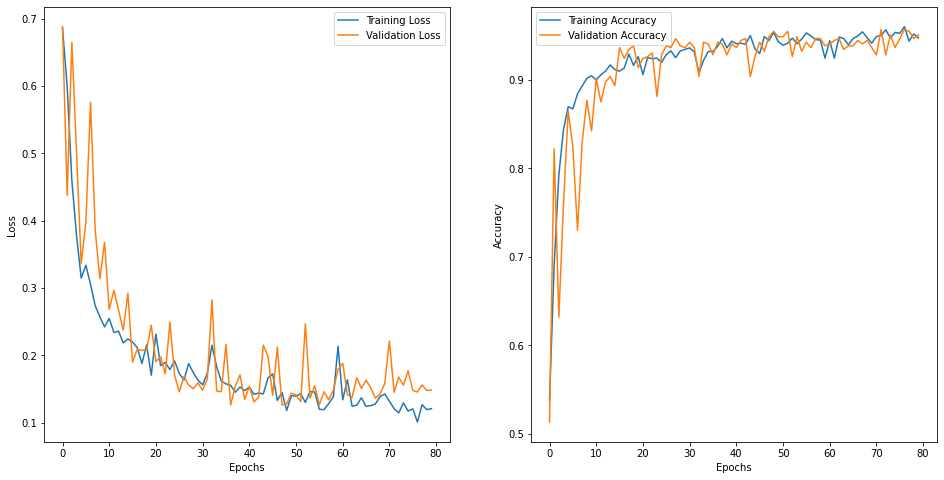

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (16, 8))

ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')

ax[0].plot(My_Model_Fit.history['loss'], color='C0',label='Training Loss')
ax[0].plot(My_Model_Fit.history['val_loss'],color='C1',label='Validation Loss')
ax[0].legend()

ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epochs')

ax[1].plot(My_Model_Fit.history['binary_accuracy'], color='C0',label='Training Accuracy')
ax[1].plot(My_Model_Fit.history['val_binary_accuracy'],color='C1',label='Validation Accuracy')
ax[1].legend()

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
        xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

Confusion matrix, without normalization


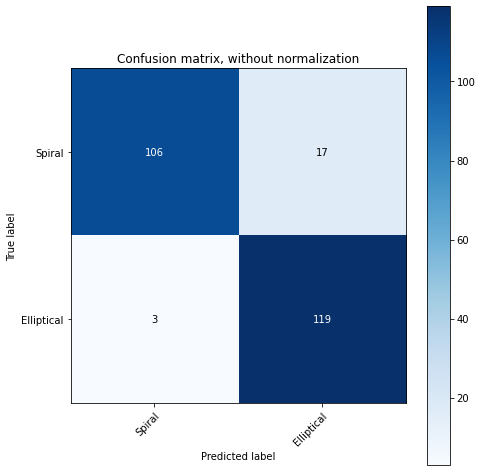

In [ ]:
predictions = My_Model.predict(x_test)

y_pred = [np.argmax(item) for item in predictions]
y_pred = np.array(y_pred)

y_true=np.argmax(y_test,axis=1)


from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['Spiral', 'Elliptical']

plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')

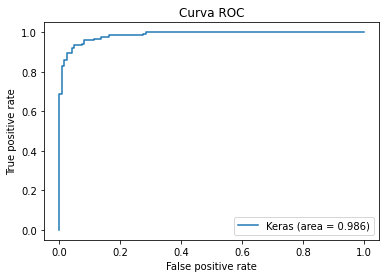

In [ ]:
from sklearn.metrics import roc_curve 
my_fpr, my_tpr, my_thresholds = roc_curve(y_true, predictions[:, 1])

from sklearn.metrics import auc
auc = auc(my_fpr, my_tpr)

fig, ax = plt.subplots()

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Curva ROC')
plt.plot(my_fpr, my_tpr, label='Keras (area = {:.3f})'.format(auc))
plt.legend(loc='best')

In [ ]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

Accuracy Score =  0.9183673469387755


# Avaliação com melhor modelo


In [ ]:
best_model = tf.keras.models.load_model('my_best_model')

O conjunto de labels de teste original é y_test. O OHE é aplicado sobre este conjunto mesmo, então para obter o conjunto ordinal original é preciso usar argmax.

O Conjunto de predições é obtido aplicando o modelo a x_test

Confusion matrix, without normalization


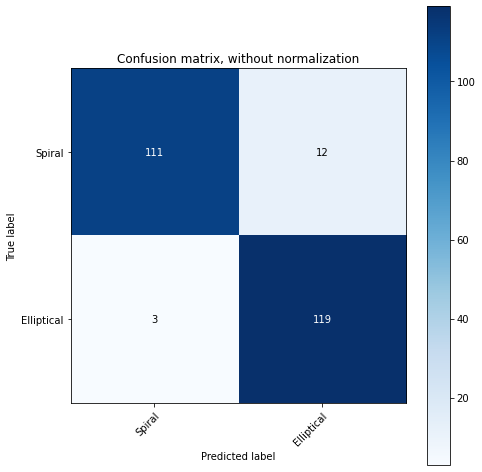

In [ ]:
best_predictions = best_model.predict(x_test)

best_y_pred = [np.argmax(item) for item in best_predictions]
best_y_pred = np.array(best_y_pred)

best_y_true=np.argmax(y_test,axis=1)

from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(best_y_true,best_y_pred)

class_names=['Spiral', 'Elliptical']

plot_confusion_matrix(best_y_true, best_y_pred, classes = class_names,title = 'Confusion matrix, without normalization')

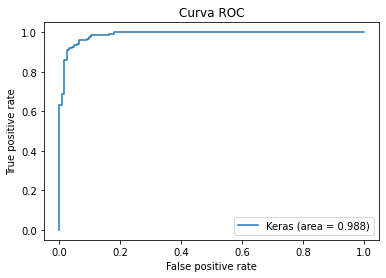

In [ ]:
from sklearn.metrics import roc_curve 
best_my_fpr, best_my_tpr, best_my_thresholds = roc_curve(best_y_true, best_predictions[:, 1])

from sklearn.metrics import auc
best_auc = auc(best_my_fpr, best_my_tpr)

fig, ax = plt.subplots()

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Curva ROC')
plt.plot(best_my_fpr, best_my_tpr, label='Keras (area = {:.3f})'.format(best_auc))
plt.legend(loc='best')

In [ ]:
#Classification accuracy
from sklearn.metrics import accuracy_score
best_acc_score = accuracy_score(best_y_true, best_y_pred)
print('Accuracy Score = ', best_acc_score)

Accuracy Score =  0.9387755102040817


# Salvando o modelo

In [ ]:
model_history = pd.DataFrame(data = My_Model_Fit.history)
model_history.index += 1 # Para que coluna index seja equivalente a época e comece em 1 em vez de 0

display(model_history)

,loss,binary_accuracy,val_loss,val_binary_accuracy
1,0.685597,0.537967,0.688150,0.513292
2,0.599304,0.691005,0.437762,0.822086
3,0.459769,0.792640,0.664752,0.631902
4,0.378224,0.844042,0.501622,0.760736
5,0.314694,0.869743,0.336040,0.865031
...,...,...,...,...
76,0.120541,0.952687,0.147871,0.946830
77,0.100969,0.960280,0.145589,0.957055
78,0.126705,0.943925,0.156236,0.955010
79,0.119364,0.952103,0.147795,0.946830


In [ ]:
# Salvando último modelo
My_Model.save('/content/drive/MyDrive/.../modelos/CNN-1/CNN_1_80epochs')

#Salvando melhor modelo
best_model.save('/content/drive/MyDrive/.../modelos/CNN-1/CNN_1_best_model')

# Salvando histórico
model_history.to_csv('/content/drive/MyDrive/.../modelos/CNN-1/CNN_1_80epochs.csv', index=True) 